###  Dataset Acquisition

**Dataset Title:** Car Prices  
**Source:** [Kaggle - Vehicle Sales Data by Syed Anwar Afridi](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data)  
**File Type:** CSV  
**Size:** 558,838 rows × 16 colum**Overview:Hi everyone! This project is about analyzing used car prices using a real dataset from Kaggle. It has over half a million car listings with details like make, model, year, mileage, price, and more.  
The main goal is to explore what factors influence the price of a car and get the data ready for building a model that can predict car prices.
ailed.


**First Thoughts, Assumptions, Issues:**  
After I loaded the data set, something I noticed is that there is a significant amount of missing data in a few of the important - 
**transmission:** 65,352 missing  
- **condition:** 11,820 missing  
- **body:** 13,195 missing  
- **make:** 10,301 missing  
- **model:** 10,399 missing  
- **trim:** 10,651 missing  
- **odometer:** 94 missing  
- **color** and **interior:** 749 missing each  
- **sellingprice** and **saledate:** 12 missing each  
- 4 missingsing  
ition`, and `odometer`.


### Importing Libraries


Before I initiated any analytic procedures, I imported the necessary Python libraries:imported the necessary Python libraries:
ecessary Python libraries:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



df = pd.read_csv("car_prices.csv")  


df.replace([np.inf, -np.inf], np.nan, inplace=True)
warnings.simplefilter(action='ignore', category=FutureWarning)


### 📦 Importing Libraries

Before we can begin working with the data, we need to import several essential Python libraries. These libraries will help us with data loading, cleaning, manipulation, analysis, modeling, and visualization.

In this project, we are using:

- **pandas** – for reading, cleaning, and manipulating tabular data.
- **numpy** – for numerical operations and working with arrays.
- **matplotlib.pyplot** – for creating basic visualizations such as histograms and scatter plots.
- **seaborn** – for building advanced and visually appealing statistical graphics.
- **MinMaxScaler** from `sklearn.preprocessing` – for scaling numeric features (optional use).
- **warnings** – for suppressing warning messages to keep the notebook output clean.
- **train_test_split** from `sklearn.model_selection` – for splitting the dataset into training and testing sets, which is essential for evaluating model performance.
- **LinearRegression** from `sklearn.linear_model` – for creating a linear regression model that predicts car prices based on various features.
- **r2_score** and **mean_squared_error** from `sklearn.metrics` – for evaluating the accuracy of the regression model.
  - **R-squared** tells us how well the model fits the data.
  - **Mean Squared Error (MSE)** measures the average squared difference between predicted and actual values.


### 🧠 Why All Imports Are in One Cell

There are several reasons why we include all import statements in a single cell at the beginning:

- It improves **readability** and keeps the notebook well-organized.
- It helps readers quickly identify all the tools and libraries being used.
- It ensures that all required packages are loaded before any data processing begins.
y data processing begins.
 data is processed.

## 2. Methods Employed in Loading Data


1. Used `df.info()` to inspect the structure of the dataset, including data types and the number of non-null values per column. This helps identify columns with missing data and understand the overall shape of the data.

2. Called `df.describe()` to generate descriptive statistics of the numerical columns. This provides insight into distributions, central tendencies, and variability in the data.

3. Checked for missing values with `df.isnull().sum()`. This counts how many null values are present in each column, which guides the cleaning process.

4. Displayed the first 10 rows of the dataset with `df.head(10)` to get an overview of the data entries, verify formatting, and detect any immediate errors or anomalies.
y the types of variables that are present.re present.

In [4]:

print("information:")
print(df.info())

print("describe:")
print(df.describe()) 

print("missing value:")
print(df.isnull().sum())

print("show first 10 rows:")
print(df.head(10))



information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None
describe:
     

## 3. Data Cleaning and Pre-processing

### Handling Missing Data

First let's check the amount of missing data in each column:

We want to identify which columns have missing values and their counts.
Then, we decide how to handle missing values based on the percentage missing and the type of data.



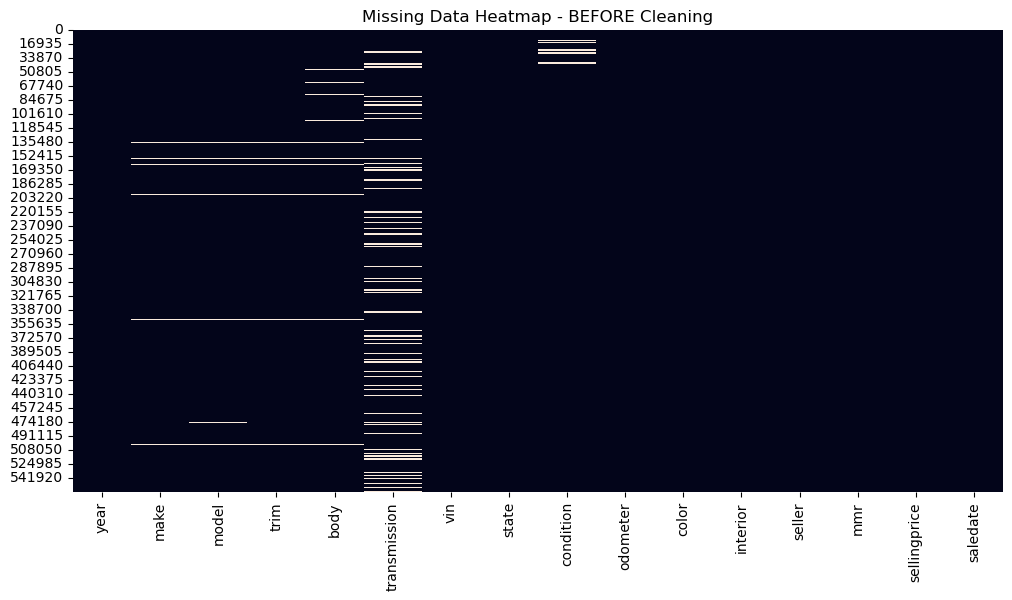

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap - BEFORE Cleaning")
plt.show()

## 3. Data Cleaning and Pre-processing

### Handling Missing Data


1. **Categorical Columns**:  
   The columns `make`, `model`, `trim`, `body`, and `transmission` contained missing values. These were filled with `"unknown"` to retain all rows, ensuring that no valuable records were lost due to incomplete information.

2. **Frequent Category Imputation**:  
   The `color` and `interior` columns had missing values, which were filled using their **most common values (mode)**. This helped maintain category consistency and avoided introducing rare or invalid values.

3. **Numeric Columns**:  
   For `condition`, `odometer`, and `mmr`, missing values were filled using the **median** rather than the mean, as the median is more robust to outliers and skewed distributions.

4. **Dropping Critical Nulls**:  
   Rows with missing values in key columns like `vin`, `sellingprice`, and `saledate` were dropped. These fields are essential for identifying the car, tracking transactions, and performing time-series analysis.

5. **Datetime Conversion**:  
   The `saledate` column was successfully converted to datetime format using `pd.to_datetime()` with `errors='coerce'` to handle any incorrect date formats safely.

6. **Final Verification**:  
   A check using `df.isnull().sum()` confirmed that there were **no remaining missing values** across any columns. The dataset is now clean, structured, and ready for analysis.
structured, and ready for analysis.
ors hence "coerce").`rs='coerce'`.
()`.
ce").`rs='coerce'`.
()`.


In [39]:


df.fillna({
    'make':'unknown',
    'model':'unknown',
    'trim':'unknown',
    'body':'unknown',
    'transmission':'unknown'
},inplace=True)
#we fill the missng color and interior with the most color used in the dataset
df.fillna({
    'color':df['color'].mode()[0],
    'interior':df['interior'].mode()[0]
},inplace=True)

# we fill the  missing value in condition, odometer and mmr with the median value
df.fillna({
    'condition':df['condition'].median(),
    'odometer':df['odometer'].median(),
    'mmr':df['mmr'].median()
},inplace=True)
#we drop rows where any of vin, sellingprice and saledate columns have missing values
df.dropna(subset=['vin', 'sellingprice', 'saledate'], inplace=True)
#check for any missing value

df['saledate'] = pd.to_datetime(df['saledate'].astype(str), errors='coerce')

print(df['saledate'].dtype)
print(df.isnull().sum())


datetime64[ns, UTC]
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


### Verification after Cleaning

Post cleaning:
- All missing values are dealt with as reported via `df.isnull().sum()` which confirms there are **zero missing values** in all columns,
- The `saledate` has been successfully converted to `datetime64[ns]`, to allow for temporal exploration and filtering,
- The data is clean, consistent, and ready for exploratory data analysis and visualization.

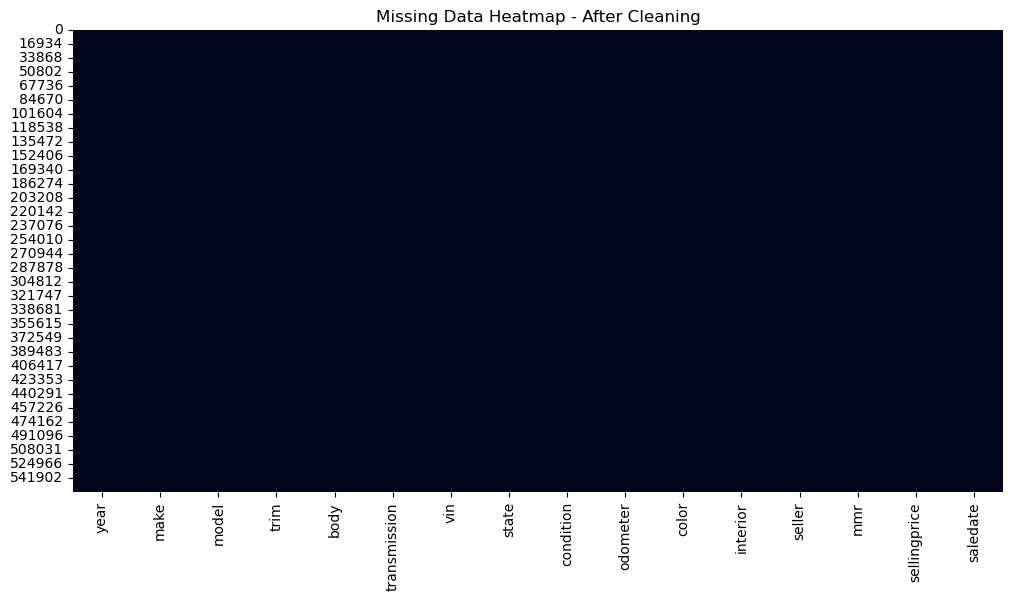

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap - After Cleaning")
plt.show()

## Step 4: Exploratory Data Analysis (EDA)
In this section, I will explore the data to identify trends, patterns, and relationships using various visualizations.


### 4.1 Selling Price Distribution

The histogram showed that most vehicles sell for lower prices, with a small number of expensive cars creating a right-skewed distribution.


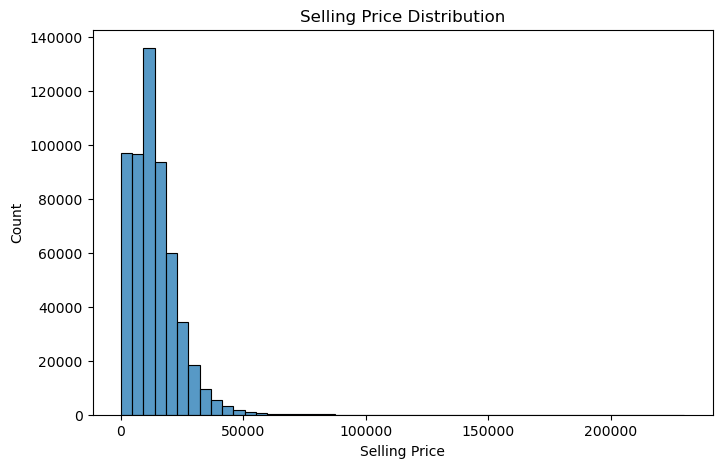

In [52]:

plt.figure(figsize=(8,5))
sns.histplot(df['sellingprice'], bins=50)
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()


### 4.2 Mileage vs. Selling Price

By grouping mileage into bins, we observed that average selling price drops as mileage increas — confirming that higher mileage reduces car value.
ket value.


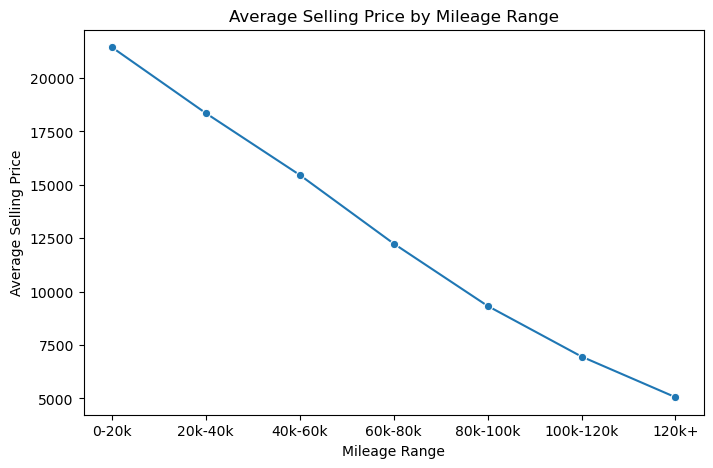

In [18]:

df['odometer_bin'] = pd.cut(df['odometer'], bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 150000], labels=[
    '0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k+'])

# Group and plot
avg_price_by_mileage = df.groupby('odometer_bin', observed=True)['sellingprice'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_price_by_mileage, x='odometer_bin', y='sellingprice', marker='o')
plt.title("Average Selling Price by Mileage Range")
plt.xlabel("Mileage Range")
plt.ylabel("Average Selling Price")
plt.show()


### 4.3 Body Type and Price

A bar plot of the top 7 body types showed that SUVs and trucks have higher average selling prices than sedans and smaller cars.
rends**.

.


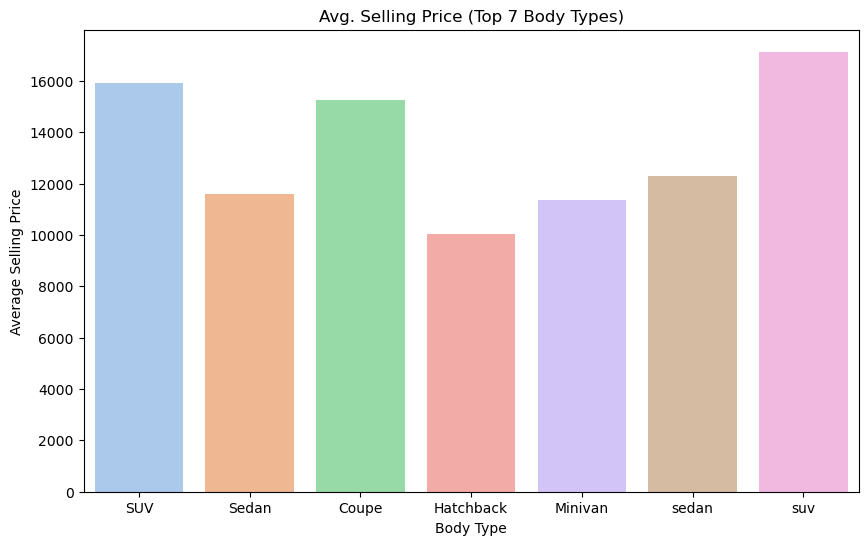

In [17]:

top_bodies = df['body'].value_counts().nlargest(7).index
filtered_df = df[df['body'].isin(top_bodies)]

# Plot average selling price for top 7
plt.figure(figsize=(10,6))
sns.barplot(x='body', y='sellingprice', data=filtered_df, estimator='mean', errorbar=None, palette='pastel')
plt.title("Avg. Selling Price (Top 7 Body Types)")
plt.xlabel("Body Type")
plt.ylabel("Average Selling Price")
plt.show()


### 4.4 Feature Correlation Heatmap

The heatmap revealed:
- A positive correlation between `year` and price (newer cars cost more).
- A negative correlation between `odometer` and price.
- `mmr` is closely aligned with selling price and may serve as a reliable benchmark.
e selection.


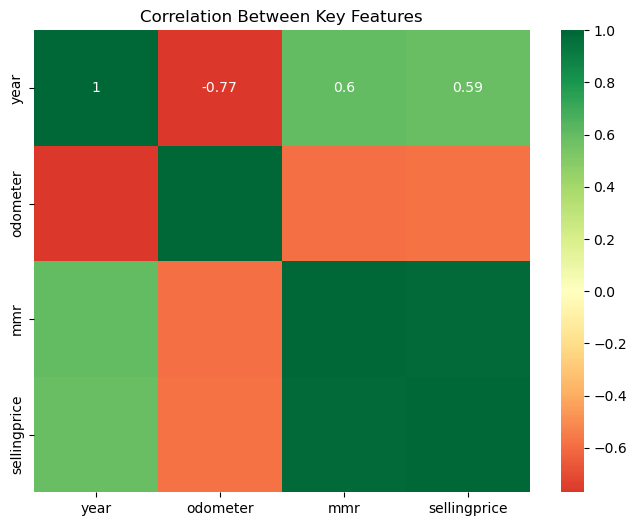

In [25]:

numeric_features = ['year', 'odometer', 'mmr', 'sellingprice']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr().round(2), annot=True, cmap='RdYlGn', center=0)
plt.title("Correlation Between Key Features")
plt.show()


### 4.5 Summary of Key Findings

Our visual analysis highlighted several important patterns:

- **Selling Price Distribution:**  
  Most cars sell in the lower price range, with fewer high-end vehicles creating a right-skewed distribution.

- **Mileage vs. Price:**  
  Cars with lower mileage typically sell for higher prices, while high-mileage vehicles lose value.

- **Body Type Influence:**  
  SUVs and trucks tend to have higher average prices than sedans or coupes, showing body type impacts market value.

- **Correlations:**  
  - Newer cars (`year`) are positively correlated with higher prices.  
  - More mileage (`odometer`) relates to lower prices.  
  - The `mmr` (market price) aligns well with actual selling prices.

These findings provide a clear understanding of key factors affecting car prices.
ecting car prices.istical analyses.
es and market
 assessments.
ore.


## 6. Statistical Modelling

Linear Regression Model: Predicting Car Selling Prices

In this section, we train a basic **Linear Regression** model to predict the `sellingprice` of cars using just two numerical features: `year` and `odometer`.
.
 Here's what this code does:
1. **Defines input features and target**:  
   We use `year` and `odometer` as the input features (X), and `sellingprice` as the target (y).

2. **Splits the dataset** into training and testing sets, using 80% of the data for training and 20% for testing.

3. **Trains the Linear Regression model** on the training data.

4. **Generates predictions** for the test set.

5. **Evaluates model performance** using:
   - **R² Score**: How well the model explains the variability in price.
   - **RMSE**: The average prediction error in dollars.

6. **Displays a comparison** between actual and predicted prices for the first 10 test samples.
 and testing sets, using 80% of the data for training and 20% for testing.

3. **Trains the Linear Regression model** on the training data.

4. **Generates predictions** for the test set.



In [24]:

X = df[['year', 'odometer']]
y = df['sellingprice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R² Score:", round(r2, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


results = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10].round(2)
})
print("\nActual vs Predicted Prices (first 10):")
print(results)

R² Score: 0.3858
Root Mean Squared Error (RMSE): 7655.31

Actual vs Predicted Prices (first 10):
   Actual Price  Predicted Price
0       29700.0         18889.54
1       11900.0         18430.63
2        8300.0         10998.69
3       12100.0         19158.34
4       26500.0         16651.13
5       15100.0         20342.00
6       20800.0         18703.73
7        7300.0         11708.39
8       26000.0         20391.69
9        8200.0         18837.06



##  Model Evaluation Summary

- **R² Score: 0.386**  
  The model explains about 39% of the variation in car prices using just `year` and `odometer`.

- **RMSE: $7,655**
 
  On average, the predictions are off by around $7,655.



##  Insight

The model is basic and gives a rough estimate. To improve accuracy, we can add more features like `make`, `model`, and `condition`.
condition`.
 steps.


## Conclusion

This project involved loading, cleaning, and analyzing a large car sales dataset to understand the factors influencing vehicle prices. We addressed missing data by imputing categorical and numerical values and removing rows with critical missing fields, resulting in a clean dataset ready for analysis.

Our exploratory visualizations revealed key insights: car selling prices are right-skewed, with lower-priced vehicles dominating the market. Mileage negatively impacts price, as higher mileage cars sell for less. Body type significantly affects value, with SUVs and trucks generally fetching higher prices. Correlation analysis confirmed that newer cars tend to sell for more, while mileage reduces price, and the market mean range (mmr) aligns well with actual selling prices.

These findings provide a solid foundation for building predictive models or conducting further detailed analyses. Overall, the dataset is now well-prepared, and the insights gained offer valuable guidance for pricing strategies in the used car market.
